In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
aisles = pd.read_csv('./datas/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
departments = pd.read_csv('./datas/departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
products = pd.read_csv('./datas/products.csv')
print(aisles.shape, departments.shape, products.shape)
products.head()

(134, 2) (21, 2) (49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
# merge aisle, department, products
products_detail = pd.merge(products, aisles, on= 'aisle_id')
products_detail = pd.merge(products_detail, departments, on= 'department_id')
products_detail 

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks
...,...,...,...,...,...,...
49683,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk
49684,28655,Crystallized Ginger Chunks,18,10,bulk dried fruits vegetables,bulk
49685,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk
49686,38007,Naturally Sweet Plantain Chips,18,10,bulk dried fruits vegetables,bulk


In [8]:
for i, j, k in zip(products['aisle_id'][:10], products['department_id'][:10], products['product_id']):
    print('|depart:',departments['department'][departments['department_id'] == j].to_string(index = False),
          '|aisle:', aisles['aisle'][aisles['aisle_id'] == i].to_string(index = False),
          '|product:',products['product_name'][products['product_id'] == k].to_string(index = False))
    

|depart: snacks |aisle: cookies cakes |product: Chocolate Sandwich Cookies
|depart: pantry |aisle: spices seasonings |product: All-Seasons Salt
|depart: beverages |aisle: tea |product: Robust Golden Unsweetened Oolong Tea
|depart: frozen |aisle: frozen meals |product: Smart Ones Classic Favorites Mini Rigatoni With...
|depart: pantry |aisle: marinades meat preparation |product: Green Chile Anytime Sauce
|depart: personal care |aisle: cold flu allergy |product: Dry Nose Oil
|depart: beverages |aisle: juice nectars |product: Pure Coconut Water With Orange
|depart: frozen |aisle: frozen produce |product: Cut Russet Potatoes Steam N' Mash
|depart: dairy eggs |aisle: yogurt |product: Light Strawberry Blueberry Yogurt
|depart: beverages |aisle: water seltzer sparkling water |product: Sparkling Orange Juice & Prickly Pear Beverage


In [9]:
order_products__prior = pd.read_csv('./datas/order_products__prior.csv')
order_products__train = pd.read_csv('./datas/order_products__train.csv')
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [138]:
# order_products__prior['product_id'].isnull().sum()

0

In [12]:
orders = pd.read_csv('./datas/orders.csv')
print(len(orders))
orders.head(30)

3421083


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [13]:
# orders_total_df = 
order_products = pd.concat([order_products__train, order_products__prior], axis=0)
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [14]:
orders_details = pd.merge(orders, order_products, how = 'outer', on = 'order_id')
orders_details.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0


In [15]:
# eval_set 
orders_details[orders_details['product_id'].isnull()]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
384,2774568,3,test,13,5,15,11.0,NaN,NaN,NaN
403,329954,4,test,6,3,12,30.0,NaN,NaN,NaN
464,1528013,6,test,4,3,16,22.0,NaN,NaN,NaN
1086,1376945,11,test,8,6,11,8.0,NaN,NaN,NaN
1161,1356845,12,test,6,1,20,30.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
33892542,2728930,206202,test,23,2,17,6.0,NaN,NaN,NaN
33892729,350108,206204,test,5,4,14,14.0,NaN,NaN,NaN
33893066,1043943,206206,test,68,0,20,0.0,NaN,NaN,NaN
33893290,2821651,206207,test,17,2,13,14.0,NaN,NaN,NaN


In [27]:
# order_detail_new = pd.merge(orders_details, products, how = 'outer', on= 'product_id')
# order_merged_detail = pd.merge(order_detail_new, aisles, on= 'aisle_id', how = 'outer')
# order_merged_detail = pd.merge(order_merged_detail, departments, on= 'department_id', how = 'outer')
order_merged_detail.shape

(33894109, 15)

In [22]:
order_merged_detail.head(20)
order_merged_detail.to_csv('./datas/order_merged_info.csv')

11.114836226863012


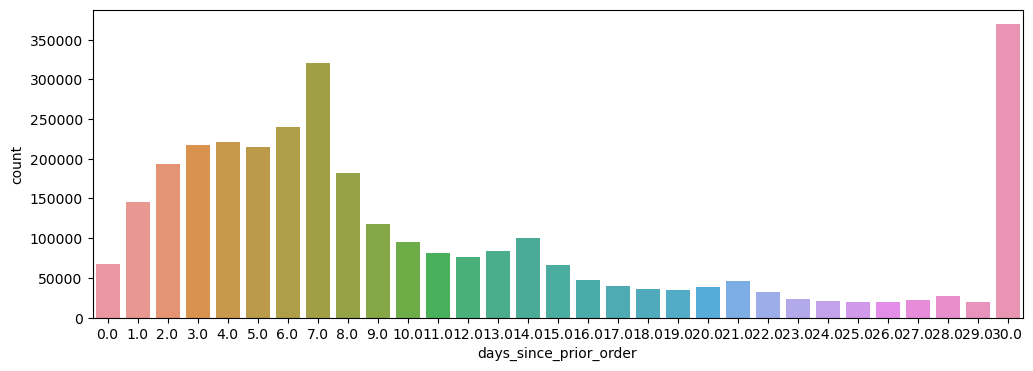

In [110]:
print(orders['days_since_prior_order'].mean())
plt.figure(figsize = (12,4))
sns.countplot(x = orders['days_since_prior_order'])
plt.show()

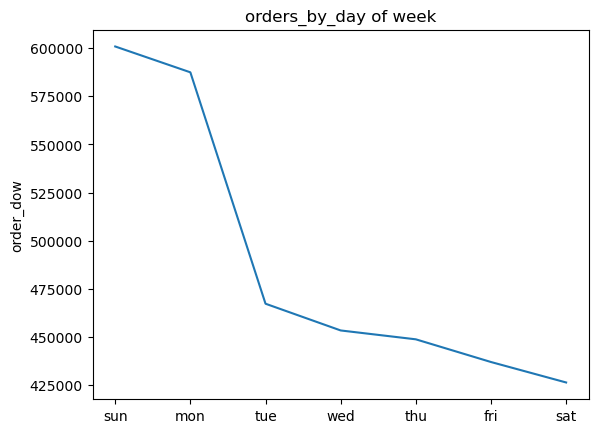

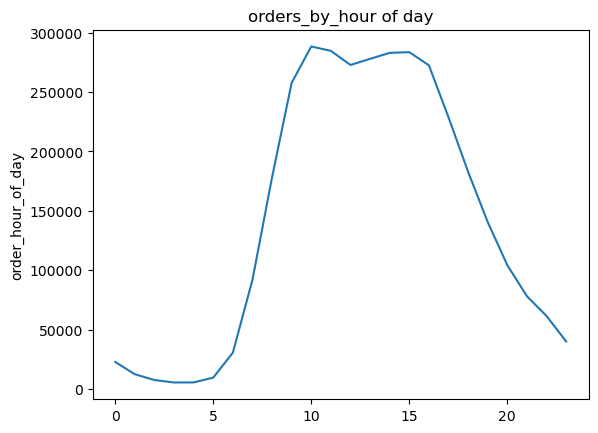

In [88]:
orders_by_dow = orders['order_dow'].value_counts()
orders_by_hod = orders['order_hour_of_day'].value_counts()
# index_values = ['sun','mon', 'tue', 'wed','thu', 'fri','sat']
orders_by_dow = orders_by_dow.set_axis(index_values)

sns.lineplot(orders_by_dow)
plt.title("orders_by_day of week")
plt.show()
sns.lineplot(orders_by_hod)
plt.title("orders_by_hour of day")
plt.show()

ValueError: Could not interpret value `department_id` for parameter `hue`

In [30]:
# days_since_last_order와 재구매 항목간에 관계가 있을지
# 사람마다 카테고리별로 구매하는 항목들이 정해져 있을지
# 첫 구매는 언제 많이 이루어 지는가? days_since_prior_order == NaN
import pickle

with open('order_merged_info.pkl', 'wb') as f:
    pickle.dump(order_merged_detail, f)